### Numerical Features

In [2]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.1/124.9 MB 1.4 MB/s eta 0:01:27
   ---------------------------------------- 0.4/124.9 MB 3.4 MB/s eta 0:00:37
    --------------------------------------- 1.8/124.9 MB 10.5 MB/s eta 0:00:12
   - -------------------------------------- 3.9/124.9 MB 17.9 MB/s eta 0:00:07
   - -------------------------------------- 4.9/124.9 MB 18.5 MB/s eta 0:00:07
   - -------------------------------------- 6.2/124.9 MB 19.8 MB/s eta 0:00:06
   -- ------------------------------------- 8.3/124.9 MB 23.0 MB/s eta 0:00:06
   --- ------------------------------------ 10.3/124.9 MB 29.8 MB/s eta 0:00:04
   ---- -----

In [4]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/35/7e/35fa1a7cf6925ff438e849cca50c88b8d28e02d9c3486442f2f85b86184a/catboost-1.2.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 0.2/101.1 MB 3.0 MB/s eta 0:00:34
   ---------------------------------------- 1.1/101.1 MB 8.8 MB/s eta 0:00:12
   - -------------------------------------- 3.0/101.1 MB 17.6 MB/s eta 0:00:06
   - -------------------------------------- 5.0/101.1 MB 22.7 MB/s eta 0:00:05
   -- ------------------------------------- 6.9/101.1 MB 25.9 MB/s eta 0:00:04
   -- ------------------------------------- 7.

In [36]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, normalize, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as patches
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick

import seaborn as sns 

In [6]:
df = pd.read_csv('cleaned_data.csv')

In [8]:
df.head()

,zpid,city,state,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
0,3.605544e+08,Bronx,NY,10460.0,0.0,1.0,750.0,0.016,33.2,0.269,24.9,44604.3,31504.0,141.0,2550.0
1,2.115158e+09,Bronx,NY,10468.0,1.0,1.0,750.0,0.013,34.4,0.331,63.7,66519.9,40138.0,141.0,2550.0
2,3.596626e+08,Bronx,NY,10461.0,1.0,1.0,750.0,0.023,33.9,0.432,13.9,21850.8,61087.0,141.0,2584.0
3,2.085204e+09,Bronx,NY,10457.0,0.0,1.0,750.0,0.020,32.5,0.284,14.1,66913.8,38066.0,141.0,2550.0
4,2.978893e+07,Bronx,NY,10467.0,2.0,1.0,900.0,0.025,37.2,0.351,64.3,42589.3,42639.0,141.0,2550.0


In [16]:
num_features = ['bedrooms', 'bathrooms', 'sqft', 'vacant for rent', 'median age', 'currently married', 'crime rate', 'pop dens zipcode', 'income household median', 'cost of living score ', 'price']
cat_features = ['zipcode', 'city']

In [17]:
df_num = df[num_features]

In [15]:
# summary statistics of quantitative variables
df_num.describe()

,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score
count,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000,7314.000000
mean,1.686355,1.178357,871.991797,0.026567,38.471411,0.377768,42.574528,57670.531105,86453.471014,176.605031
std,0.948453,0.368877,109.275300,0.014160,6.191669,0.099476,16.669612,33716.492368,36271.111875,22.403999
min,0.000000,1.000000,750.000000,0.000000,26.200000,0.000000,13.600000,1261.200000,21846.000000,141.000000
25%,1.000000,1.000000,750.000000,0.015000,35.000000,0.297000,30.400000,31902.900000,58850.000000,157.900000
50%,2.000000,1.000000,900.000000,0.026000,37.700000,0.365000,42.500000,53801.600000,77551.000000,172.500000
75%,2.000000,1.000000,1000.000000,0.035000,40.700000,0.461000,60.400000,76855.100000,114427.000000,204.100000
max,3.000000,2.000000,1000.000000,0.078000,86.000000,0.655000,68.400000,146955.300000,250001.000000,204.100000


#### Check Linearity

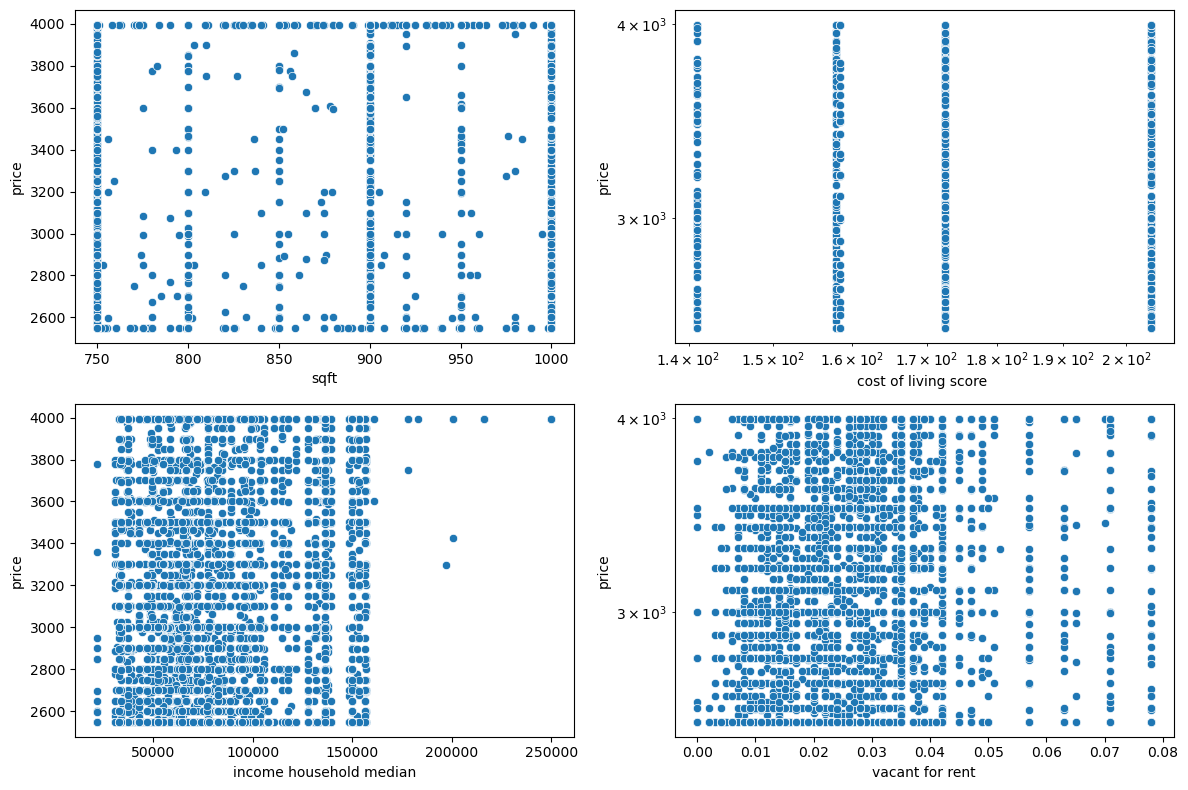

In [20]:
## looking at dependent and indenpendent variables linearity
fig, ax = plt.subplots(2, 2, figsize=(12,8))

sns.scatterplot(data = df_num, x = 'sqft', y = 'price', ax = ax[0,0])
sns.scatterplot(data = df_num, x = 'cost of living score ', y = 'price', ax = ax[0,1], palette = 'crest')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

sns.scatterplot(data = df_num, x = 'income household median', y = 'price', ax = ax[1,0])
sns.scatterplot(data = df_num, x = 'vacant for rent', y = 'price', ax = ax[1,1], palette = 'crest')
ax[1,1].set_yscale('log')

plt.tight_layout()
plt.show()

#### Key findings

- No clear trend between sqft and price, though certain sqft values are common among specific price ranges.
- Price distribution is consistent across different cost of living scores, suggesting it may not be a strong predictor of price.
- Wide variation in price at all income levels indicates that income alone isn't a strong indicator of price.

#### Check Correlations/Multicollinearity

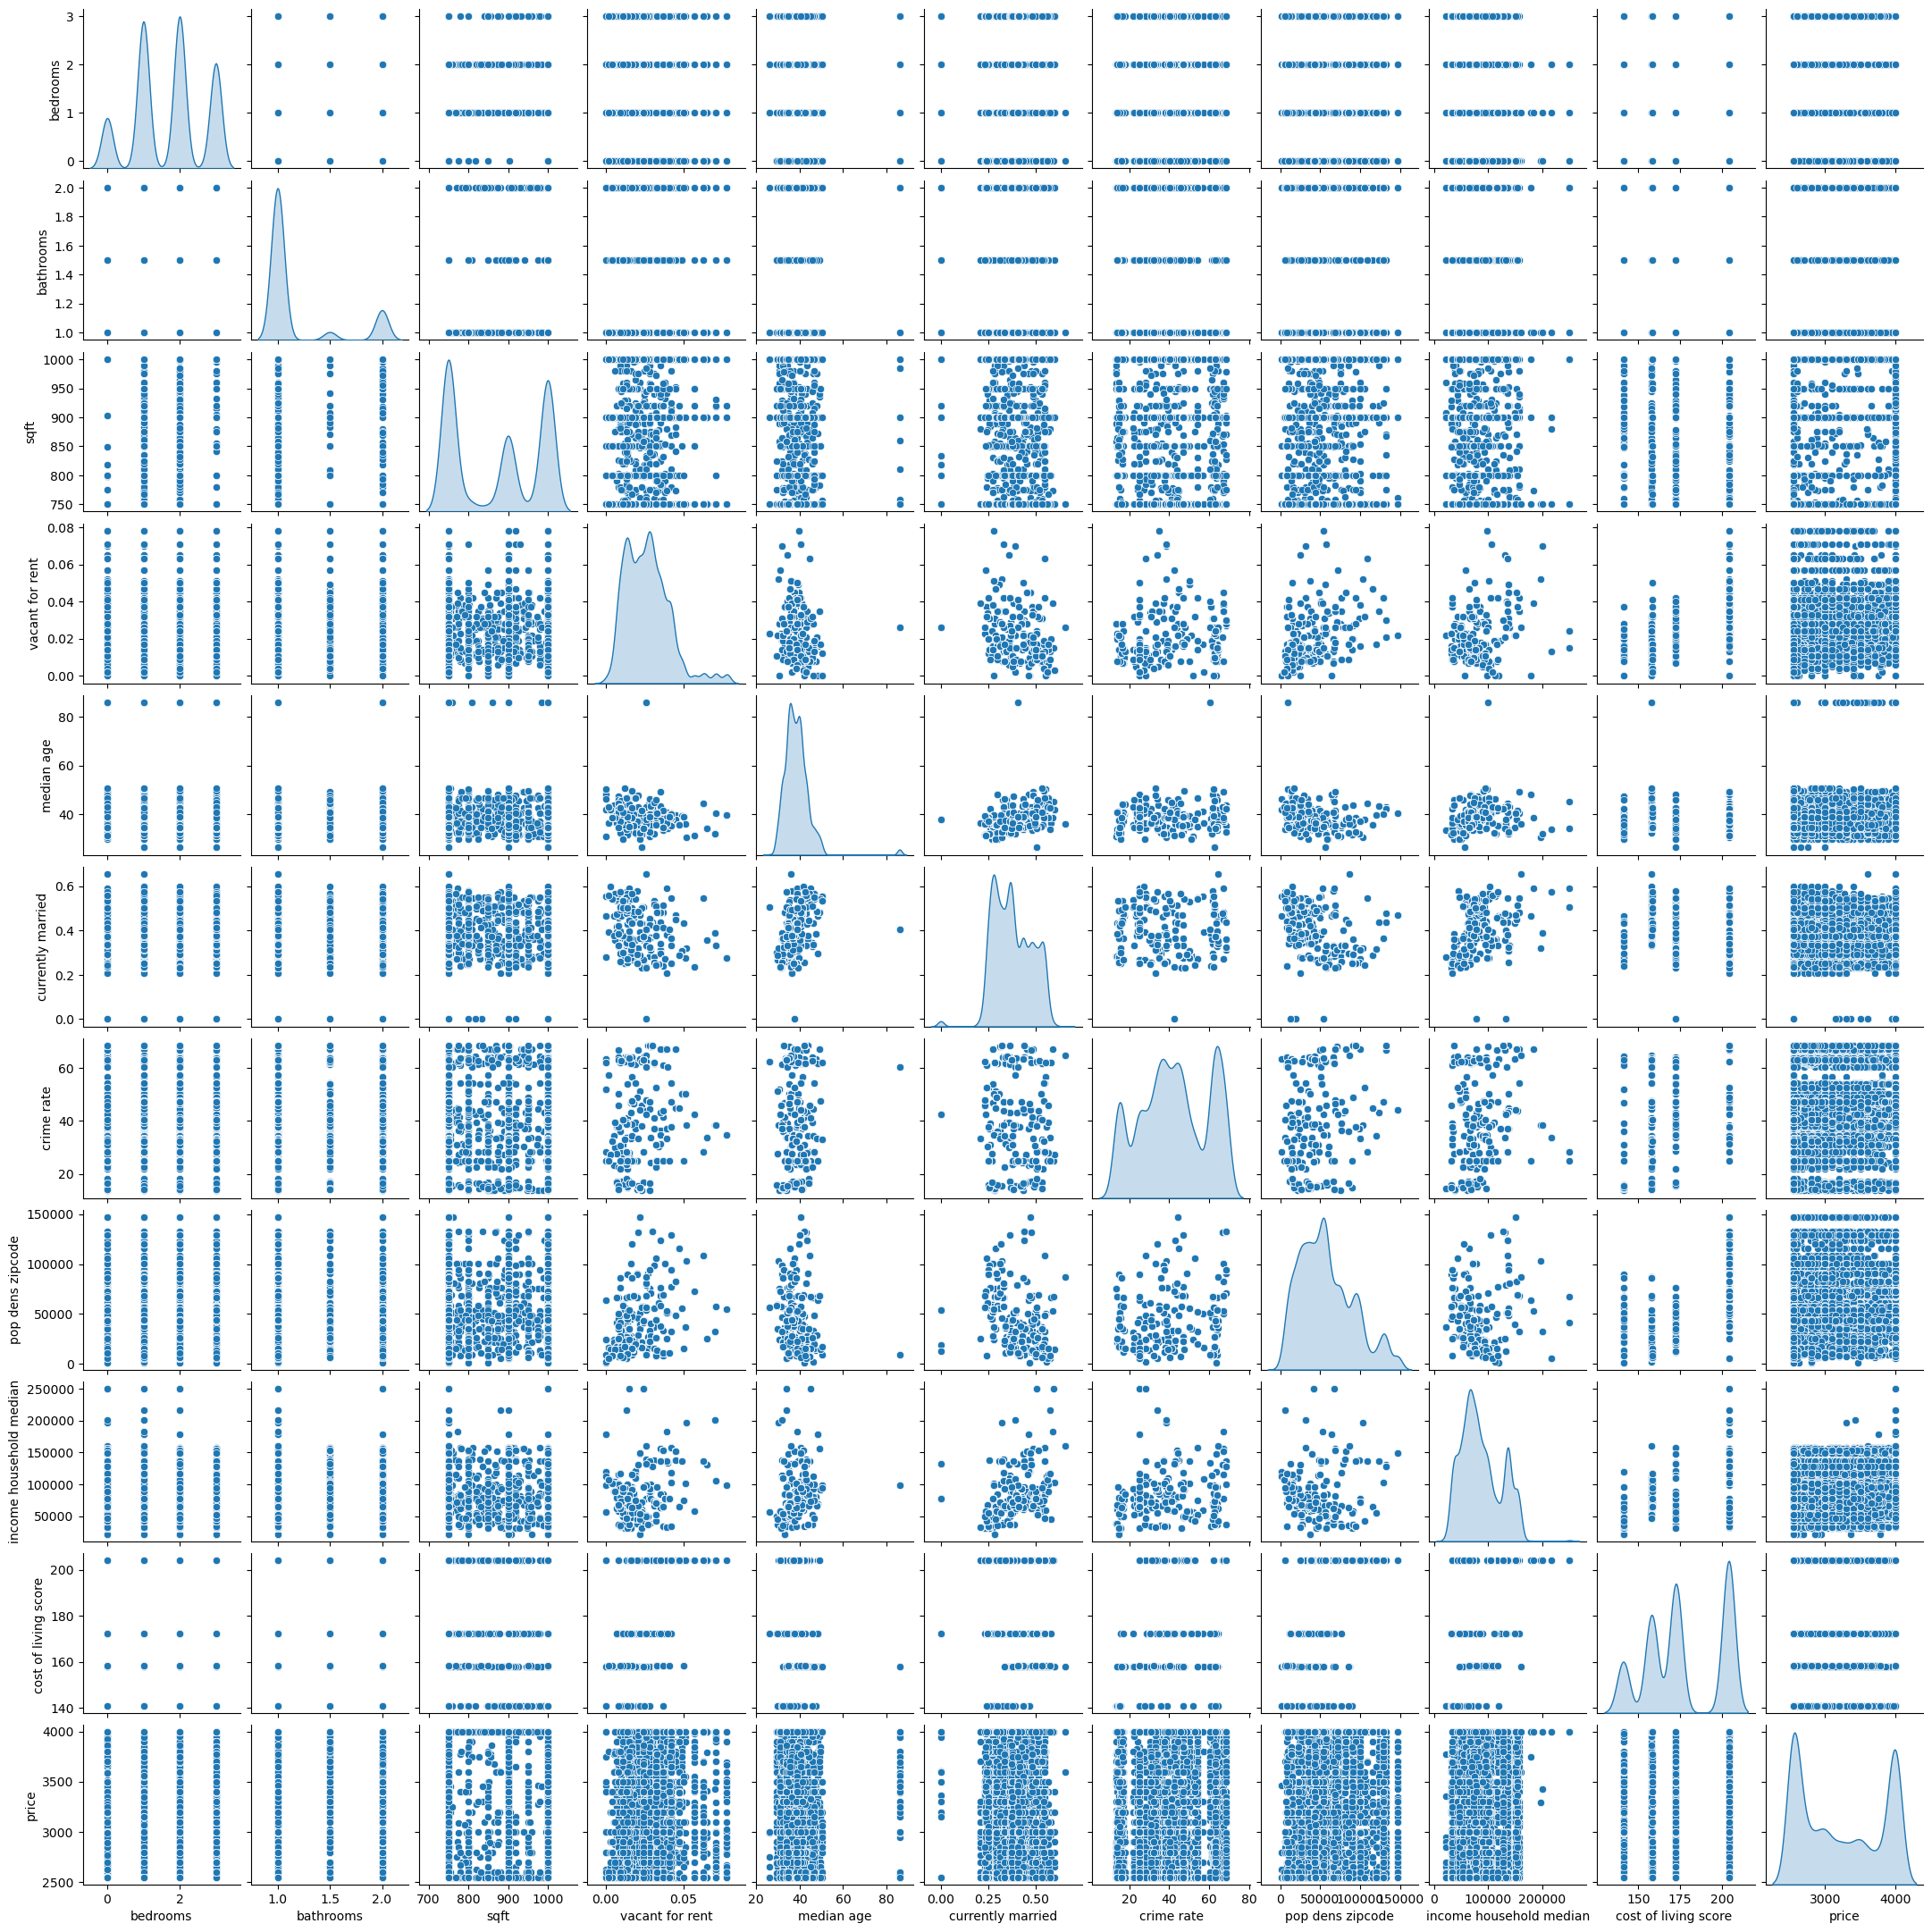

In [21]:
# pairplots to get an intuition of potential correlations
sns.pairplot(data = df_num, diag_kind="kde", height = 2)
plt.show()

#### Key findings

- Many variables show a clear pattern of distribution with little to no correlation observed between pairs such as median age and other variables, indicating isolated impacts.
- For variables like crime rate and median age, data points are densely packed at lower values with fewer outliers, suggesting skewed distributions that could affect model performance if not normalized or transformed.
- Outliers are evident in several variables, notably in sqft and price. These need to be managed either through transformations or by applying outlier handling techniques to prevent model skew.
- Diagonal plots reveal the distributions of individual variables. For instance, sqft shows a right-skewed distribution, whereas cost of living score appears multimodal.

##### Normality by Rescaling

In [22]:
# Standard Scaler
scaler_std = StandardScaler()
df_num_std = pd.DataFrame(scaler_std.fit_transform(df_num), columns=df_num.columns)
df_num_std.head()

,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price
0,-1.778128,-0.483545,-1.116448,-0.746300,-0.851430,-1.093483,-1.060357,-0.387559,-1.515069,-1.589335,-1.162493
1,-0.723707,-0.483545,-1.116448,-0.958173,-0.657608,-0.470173,1.267391,0.262482,-1.277012,-1.589335,-1.162493
2,-0.723707,-0.483545,-1.116448,-0.251927,-0.738367,0.545220,-1.720285,-1.062453,-0.699405,-1.589335,-1.103969
3,-1.778128,-0.483545,-1.116448,-0.463801,-0.964493,-0.942682,-1.708287,0.274166,-1.334141,-1.589335,-1.162493
4,0.330714,-0.483545,0.256326,-0.110678,-0.205356,-0.269105,1.303387,-0.447326,-1.208054,-1.589335,-1.162493


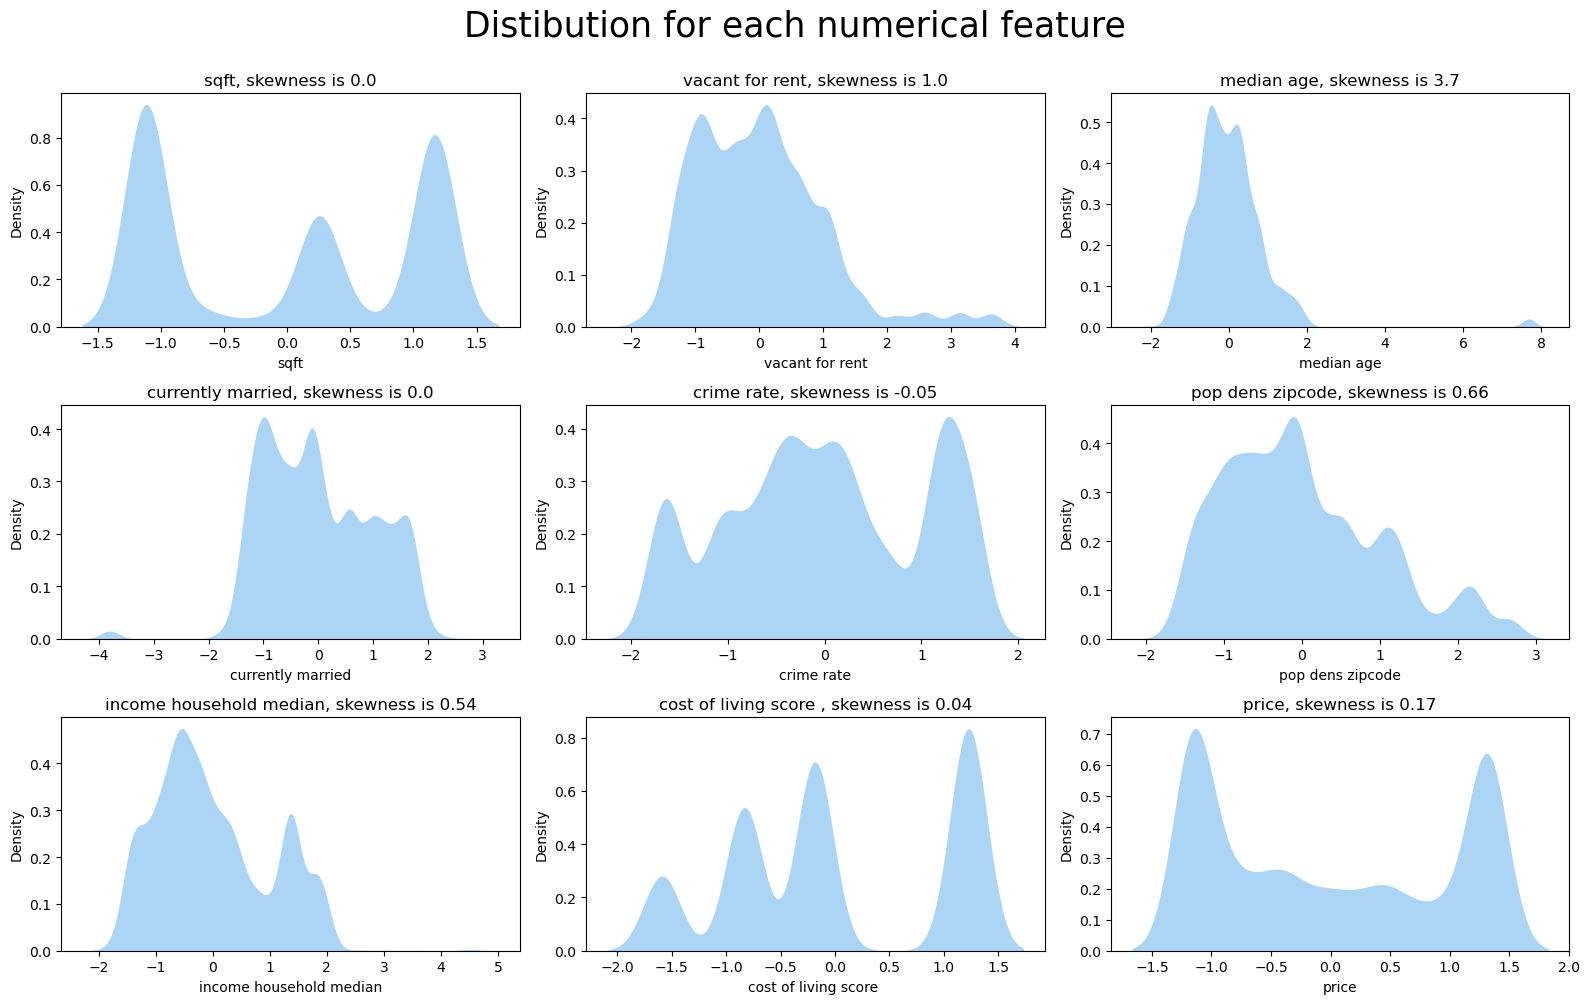

In [25]:
columns = list(df_num_std.columns)
numeric_columns = df_num_std.select_dtypes(include=[np.number]).columns.tolist()
categoric_columns = [col for col in columns if col not in numeric_columns]

items_to_remove = ['bedrooms', 'bathrooms', 'zpid', 'zipcode']
filtered_numeric_columns = [item for item in numeric_columns if item not in items_to_remove]


# Checking for distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(16,10))
    fig.suptitle(suptitle,y=1, size=25)  # add a centered title to the figure
    axs = axs.flatten() # convert the multi-dimensional array of Axes objects into a one-dimensional array
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#98CAF2')  # plot a kernel density estimate (KDE)
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2))) # skipna = True means that missing values are ignored in the calculation
        
dist_custom(dataset=df_num_std, columns_list=filtered_numeric_columns, rows=3, cols=3, suptitle='Distibution for each numerical feature')
plt.tight_layout() # automatically adjust subplot parameters so that the subplots fit into the figure area nicely.

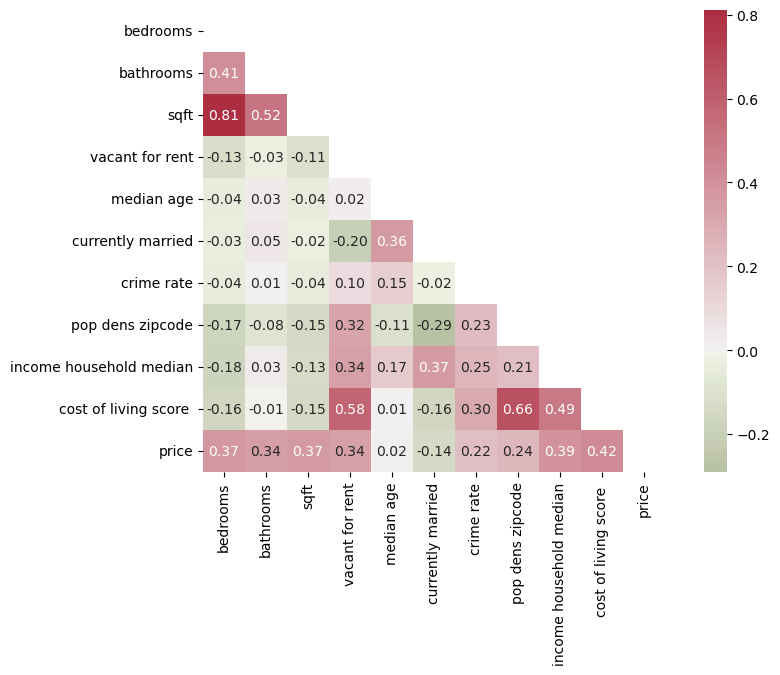

In [23]:
## correlation heatmap
corr_matrix = df_num.corr()

# Create a mask
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n = 5, center="light", as_cmap=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, mask = mask, center = 0, annot = True,
            fmt = '.2f', square=True, cmap = cmap)
plt.show()

<font color='red'> Summary:</font> 
-  may need L1/L2 regulization or variable removel to reduce overfitting caused by multicollinearity

### Categorical Feature

#### Distribution of Categorical Features

In [28]:
df_cat = df[cat_features]
df_cat['price'] = df['price']
df_cat.head(3)

,zipcode,city,price
0,10460.0,Bronx,2550.0
1,10468.0,Bronx,2550.0
2,10461.0,Bronx,2584.0


In [39]:
len(df_cat['city'].value_counts())

57

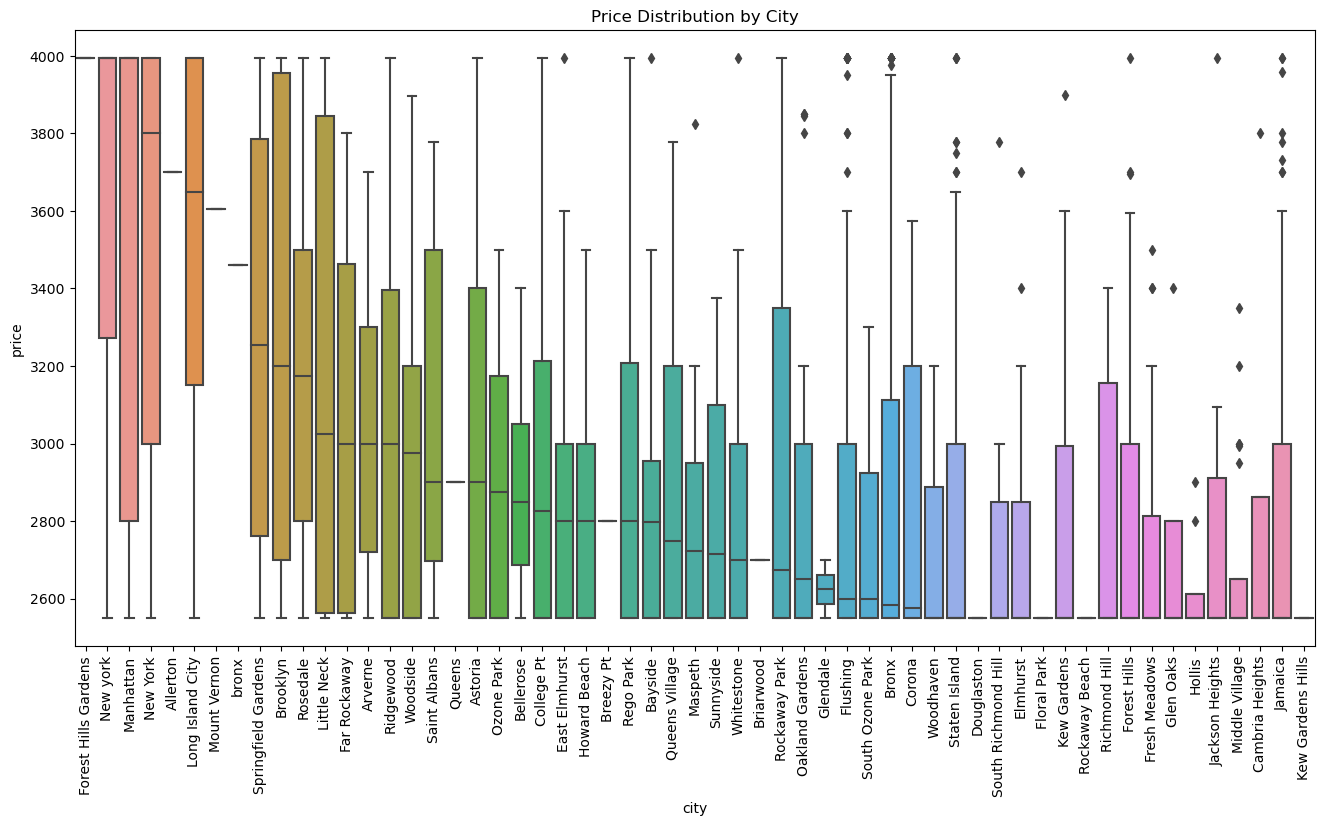

In [33]:
# distribution of price vs location
plt.figure(figsize=(16, 8))
sorted_cities = df.groupby('city')['price'].median().sort_values(ascending=False).index
sns.boxplot(x='city', y='price', data=df_cat, order=sorted_cities)
plt.xticks(rotation=90)
plt.title('Price Distribution by City')
plt.show()

#### Key findings

- There's a notable range in median prices across cities, indicating a diverse real estate market. Cities like "Forest Hills Gardens", "Long Island City", and "Manhattan" show higher median prices, while "South Richmond Hill", "Glen Oaks", and "Breezy Pt" tend towards lower median prices.
- Many cities have outliers that extend significantly beyond the upper quartiles, suggesting that there are premium properties in almost every city that vastly exceed the typical price range.
- The wide variation in prices and the presence of outliers across different cities could indicate opportunities for market segmentation and targeted real estate investments or development strategies.

In [34]:
df_cat['zipcode'].value_counts()

zipcode
10009.0    165
10003.0    161
11215.0    147
11221.0    146
10002.0    139
          ... 
10005.0      1
10282.0      1
10069.0      1
11697.0      1
10550.0      1
Name: count, Length: 179, dtype: int64

### Chi-Square Test of Independence

In [38]:
# Create a contingency table
contingency_table = pd.crosstab(df_cat['zipcode'], df_cat['city'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p)

Chi-square statistic: 310507.3986056174
P-value: 0.0


#### Key findings

-  The p-value is 0.0, which is less than the common alpha level of 0.05. This suggests that the observed association between 'zipcode' and 'city' is statistically significant.
- Given the strong association between 'zipcode' and 'city', consider keep only one of them in your model to simplify your data and avoid multicollinearity.

## Feature Engineering

### Transformation

#### Target Encoding

- When to Use: Effective if the categorical variable has a strong relationship with the target variable. This method is especially useful when dealing with high cardinality features.
- Benefits: Reduces the dimensionality and can improve model performance by introducing useful information about the target.
- How to Implement: Use the TargetEncoder from the category_encoders library.

In [41]:
!pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [42]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()
df['city_encoded'] = encoder.fit_transform(df['city'], df['price'])

In [43]:
df.head()

,zpid,city,state,zipcode,bedrooms,bathrooms,sqft,vacant for rent,median age,currently married,crime rate,pop dens zipcode,income household median,cost of living score,price,city_encoded
0,3.605544e+08,Bronx,NY,10460.0,0.0,1.0,750.0,0.016,33.2,0.269,24.9,44604.3,31504.0,141.0,2550.0,2877.284562
1,2.115158e+09,Bronx,NY,10468.0,1.0,1.0,750.0,0.013,34.4,0.331,63.7,66519.9,40138.0,141.0,2550.0,2877.284562
2,3.596626e+08,Bronx,NY,10461.0,1.0,1.0,750.0,0.023,33.9,0.432,13.9,21850.8,61087.0,141.0,2584.0,2877.284562
3,2.085204e+09,Bronx,NY,10457.0,0.0,1.0,750.0,0.020,32.5,0.284,14.1,66913.8,38066.0,141.0,2550.0,2877.284562
4,2.978893e+07,Bronx,NY,10467.0,2.0,1.0,900.0,0.025,37.2,0.351,64.3,42589.3,42639.0,141.0,2550.0,2877.284562


In [46]:
# drop redundant coloumns
# df = df.drop(columns=['zpid', 'state', 'zipcode'])

In [50]:
df_num_std['city_encoded'] = df['city_encoded']

In [52]:
df_selected = df_num_std

### Feature Selection

In [55]:
from sklearn.model_selection import train_test_split

# features and target
X = df_selected.drop('price', axis=1)  # X is all columns except 'price'
y = df_selected['price']               # y is the target variable 'price'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Print the feature importances
for i in range(len(X.columns)):
    print(f"Feature {X.columns[i]}: {importances[i]}")

Feature bedrooms: 0.18535945368985243
Feature bathrooms: 0.045044224532108545
Feature sqft: 0.16301148779482397
Feature vacant for rent: 0.05008332212133503
Feature median age: 0.02324165601377651
Feature currently married: 0.06358477423700541
Feature crime rate: 0.05354512841847824
Feature pop dens zipcode: 0.03978387294189523
Feature income household median: 0.2473504558431895
Feature cost of living score : 0.005153579598245803
Feature city_encoded: 0.12384204480928934


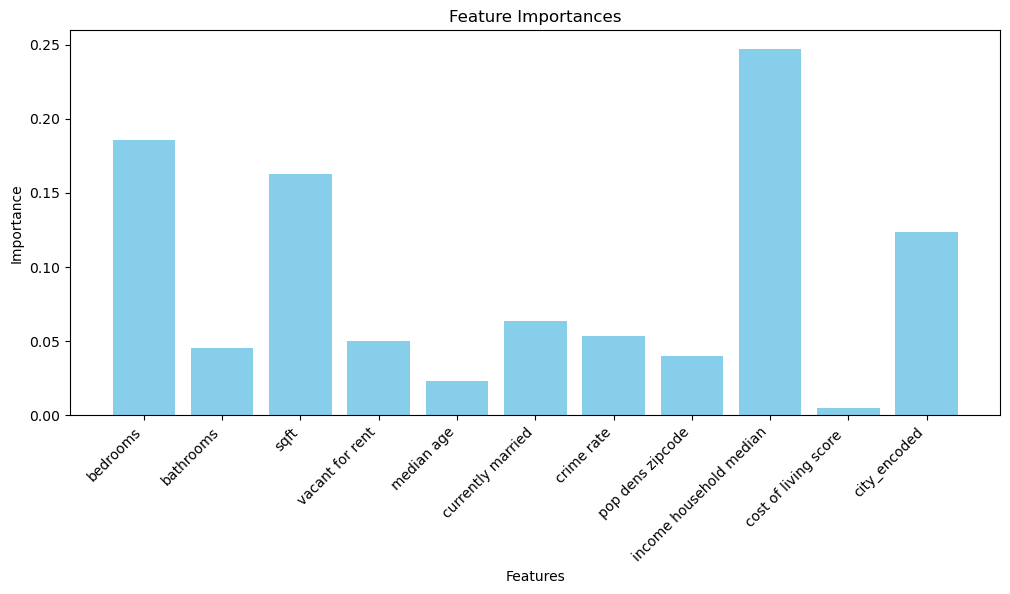

In [66]:
# Plotting the feature importances
plt.figure(figsize=(12, 5))
plt.bar(X.columns, importances, color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()